In [18]:

# !pip install matplotlib
from prompt import visualize_table_dark


In [11]:
import re

complex_input_string = """
Here are some initial thoughts and irrelevant information.

fwe<add>
    <content> Add the revenue of Q1 and Q2. </content>
    <result> $200,000. </result>
    <comment> Sum of first two quarters. </comment>
</add>

Some random text, emails, and perhaps even some misleading <content> tags which should not be counted.

\n<add>
    <content> Combine the totals of the north and south divisions. </content>
    <result> 1,500 units. </result>
    <comment> Consolidated result of divisions. </comment>
</add>

Another paragraph that talks about something completely different.

vferfw<add>
    <content> Calculate the decrease from last year's sales. </content>
    <result> 10% decrease. </result>
    <comment> Yearly sales comparison showing a decline. </comment>
</add>

This concludes our report. Thank you!
"""

In [12]:
import re

def parse_add_commands(input_str):
    # Define a regex pattern to extract each part of the add command
    add_command_pattern = re.compile(
        r'<add>\s*'
        r'<content>(.*?)</content>\s*'
        r'<result>(.*?)</result>\s*'
        r'<comment>(.*?)</comment>\s*'
        r'</add>', re.DOTALL)

    # Find all matches in the input string
    matches = add_command_pattern.findall(input_str)

    # Create a list of dictionaries for each add command found
    add_commands = []
    for content, result, comment in matches:
        add_commands.append({
            'content': content.strip(),
            'result': result.strip(),
            'comment': comment.strip()
        })

    # Debugging output to see what is being matched
    print("Matches found:", len(matches))
    for match in matches:
        print("Matched content:", match)

    return add_commands

# Example usage with the complex input string provided earlier
parsed_commands = parse_add_commands(complex_input_string)
print(parsed_commands)


Matches found: 3
Matched content: (' Add the revenue of Q1 and Q2. ', ' $200,000. ', ' Sum of first two quarters. ')
Matched content: (' Combine the totals of the north and south divisions. ', ' 1,500 units. ', ' Consolidated result of divisions. ')
Matched content: (" Calculate the decrease from last year's sales. ", ' 10% decrease. ', ' Yearly sales comparison showing a decline. ')
[{'content': 'Add the revenue of Q1 and Q2.', 'result': '$200,000.', 'comment': 'Sum of first two quarters.'}, {'content': 'Combine the totals of the north and south divisions.', 'result': '1,500 units.', 'comment': 'Consolidated result of divisions.'}, {'content': "Calculate the decrease from last year's sales.", 'result': '10% decrease.', 'comment': 'Yearly sales comparison showing a decline.'}]


In [13]:
def attach_commands_to_table(table, parsed_commands):
    # Extract the headers from the first row of the table
    headers = table[0]
    
    # Verify if the headers match with the keys in parsed_commands (excluding #step)
    expected_headers = set(headers) - {'#step'}
    if not all(set(command.keys()) == expected_headers for command in parsed_commands):
        raise ValueError("Headers in the table do not match with the keys in the commands")
    
    # Generate new rows based on parsed_commands
    new_rows = []
    for i, command in enumerate(parsed_commands, start=len(table)):
        # Create a new row initializing with #step
        new_row = [i]  # Start with #step, which is the row number starting from current table length
        
        # Populate other cells according to the header order
        for header in headers[1:]:  # Skip #step as it is already added
            new_row.append(command[header])
        
        new_rows.append(new_row)
    
    # Extend the original table with the new rows
    table.extend(new_rows)
    return table

# Example usage
table = [
    ['#step', 'content', 'result', 'comment'],
    [1, 'Add values from column A and B', 'Result of A + B', 'Explanation of the addition']
]

parsed_commands = [
    {'content': 'Multiply 40,000 by 8,000.', 'result': '320,000,000.', 'comment': 'Multiplying the tens of thousands digits directly to simplify the calculation.'},
    {'content': 'Subtract expenses from revenue.', 'result': 'Profit amount.', 'comment': 'Net profit calculation.'}
]

updated_table = attach_commands_to_table(table, parsed_commands)
for row in updated_table:
    print(row)


['#step', 'content', 'result', 'comment']
[1, 'Add values from column A and B', 'Result of A + B', 'Explanation of the addition']
[2, 'Multiply 40,000 by 8,000.', '320,000,000.', 'Multiplying the tens of thousands digits directly to simplify the calculation.']
[3, 'Subtract expenses from revenue.', 'Profit amount.', 'Net profit calculation.']


In [23]:
table = [
    ['#step', 'content', 'result', 'comment'],
]
str_response = """
Multiply 4000 by 5000:
<add>
<content>4000 * 5000</content>
<result>20000000</result>
<comment>Multiplication of the thousands</comment>
</add>

Multiply 4000 by 20:
<add>
<content>4000 * 20</content>
<result>80000</result>
<comment>Multiplication of the thousands and tens</comment>
</add>

Multiply 4000 by 6:
<add>
<content>4000 * 6</content>
<result>24000</result>
<comment>Multiplication of the thousands and units</comment>
</add>

Multiply 700 by 5000:
<add>
<content>700 * 5000</content>
<result>3500000</result>
<comment>Multiplication of the hundreds and thousands</comment>
</add>

Multiply 700 by 20:
<add>
<content>700 * 20</content>
<result>14000</result>
<comment>Multiplication of the hundreds, tens, and units</comment>
</add>

Multiply 700 by 6:
<add>
<content>700 * 6</content>
<result>4200</result>
<comment>Multiplication of the hundreds and units</comment>
</add>

Multiply 30 by 5000:
<add>
<content>30 * 5000</content>
<result>150000</result>
<comment>Multiplication of the tens and thousands</comment>
</add>

Multiply 30 by 20:
<add>
<content>30 * 20</content>
<result>600</result>
<comment>Multiplication of the tens and units</comment>
</add>

Multiply 30 by 6:
<add>
<content>30 * 6</content>
<result>180</result>
<comment>Multiplication of the tens and units</comment>
</add>

Multiply 4 by 5000:
<add>
<content>4 * 5000</content>
<result>20000</result>
<comment>Multiplication of the units and thousands</comment>
</add>

Multiply 4 by 20:
<add>
<content>4 * 20</content>
<result>80</result>
<comment>Multiplication of the units and tens</comment>
</add>

Multiply 4 by 6:
<add>
<content>4 * 6</content>
<result>24</result>
<comment>Multiplication of the units</comment>
</add>
"""

parsed_commands = parse_add_commands(str_response)
table = attach_commands_to_table(table, parsed_commands)
print(table)

Matches found: 12
Matched content: ('4000 * 5000', '20000000', 'Multiplication of the thousands')
Matched content: ('4000 * 20', '80000', 'Multiplication of the thousands and tens')
Matched content: ('4000 * 6', '24000', 'Multiplication of the thousands and units')
Matched content: ('700 * 5000', '3500000', 'Multiplication of the hundreds and thousands')
Matched content: ('700 * 20', '14000', 'Multiplication of the hundreds, tens, and units')
Matched content: ('700 * 6', '4200', 'Multiplication of the hundreds and units')
Matched content: ('30 * 5000', '150000', 'Multiplication of the tens and thousands')
Matched content: ('30 * 20', '600', 'Multiplication of the tens and units')
Matched content: ('30 * 6', '180', 'Multiplication of the tens and units')
Matched content: ('4 * 5000', '20000', 'Multiplication of the units and thousands')
Matched content: ('4 * 20', '80', 'Multiplication of the units and tens')
Matched content: ('4 * 6', '24', 'Multiplication of the units')
[['#step', 'co

In [24]:
str_response = """
Add 20000000:
<add>
<content>Add 20000000</content>
<result>20000000</result>
<comment>Adding the result of step 1</comment>
</add>

Add 80000:
<add>
<content>Add 80000</content>
<result>20080000</result>
<comment>Adding the result of step 2</comment>
</add>

Add 24000:
<add>
<content>Add 24000</content>
<result>20104000</result>
<comment>Adding the result of step 3</comment>
</add>

Add 3500000:
<add>
<content>Add 3500000</content>
<result>23604000</result>
<comment>Adding the result of step 4</comment>
</add>

Add 14000:
<add>
<content>Add 14000</content>
<result>23618000</result>
<comment>Adding the result of step 5</comment>
</add>

Add 4200:
<add>
<content>Add 4200</content>
<result>23622200</result>
<comment>Adding the result of step 6</comment>
</add>

Add 150000:
<add>
<content>Add 150000</content>
<result>23772200</result>
<comment>Adding the result of step 7</comment>
</add>

Add 600:
<add>
<content>Add 600</content>
<result>23772800</result>
<comment>Adding the result of step 8</comment>
</add>

Add 180:
<add>
<content>Add 180</content>
<result>23772980</result>
<comment>Adding the result of step 9</comment>
</add>

Add 20000:
<add>
<content>Add 20000</content>
<result>23792980</result>
<comment>Adding the result of step 10</comment>
</add>

Add 80:
<add>
<content>Add 80</content>
<result>23793060</result>
<comment>Adding the result of step 11</comment>
</add>

Add 24:
<add>
<content>Add 24</content>
<result>23793084</result>
<comment>Adding the result of step 12</comment>
</add>
"""

parsed_commands = parse_add_commands(str_response)
table = attach_commands_to_table(table, parsed_commands)
print(table)

Matches found: 12
Matched content: ('Add 20000000', '20000000', 'Adding the result of step 1')
Matched content: ('Add 80000', '20080000', 'Adding the result of step 2')
Matched content: ('Add 24000', '20104000', 'Adding the result of step 3')
Matched content: ('Add 3500000', '23604000', 'Adding the result of step 4')
Matched content: ('Add 14000', '23618000', 'Adding the result of step 5')
Matched content: ('Add 4200', '23622200', 'Adding the result of step 6')
Matched content: ('Add 150000', '23772200', 'Adding the result of step 7')
Matched content: ('Add 600', '23772800', 'Adding the result of step 8')
Matched content: ('Add 180', '23772980', 'Adding the result of step 9')
Matched content: ('Add 20000', '23792980', 'Adding the result of step 10')
Matched content: ('Add 80', '23793060', 'Adding the result of step 11')
Matched content: ('Add 24', '23793084', 'Adding the result of step 12')
[['#step', 'content', 'result', 'comment'], [1, '4000 * 5000', '20000000', 'Multiplication of th

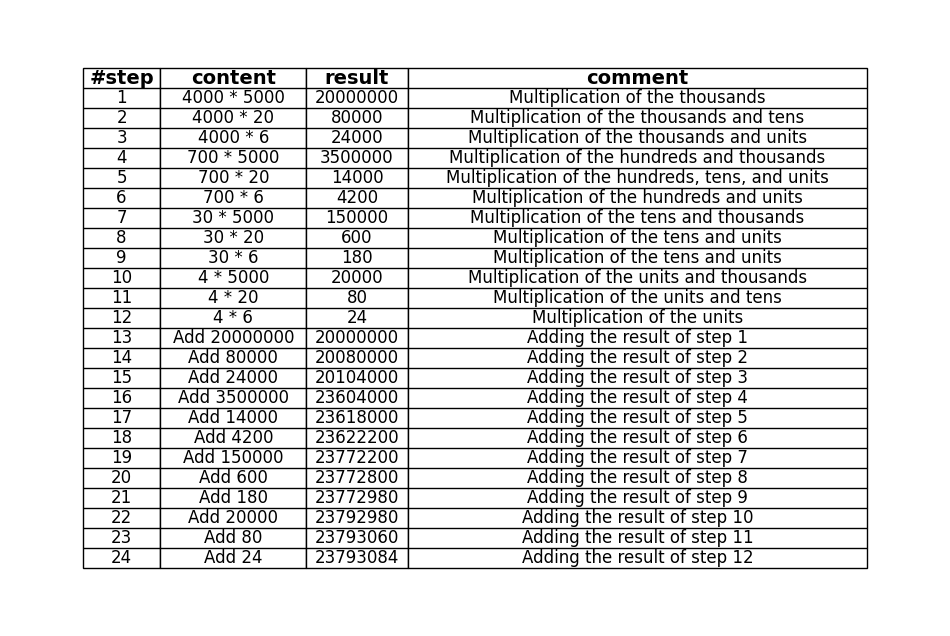

In [25]:
visualize_table_dark(table, 'temp.pdf')

In [21]:

4734 * 5026

23793084

In [22]:
23715000 + 94680 + 28404

23838084

In [26]:
3125 * 5026

15706250

In [28]:
15000000+60000+500000+2000+100000+400+25000+100+18000+600+120+30

15706250

In [29]:
5786 * 36203 

209470558

In [30]:
515563* 36203  

18664927289